In [1]:
%%time
from omniflow_project.core.network import Network
from omniflow_project._visual.visualize_network import NetworkVisualizer
from omniflow_project._inputs.resources import Resources
import omnipath as op

/home/marco/anaconda3/envs/pypath_env/lib/python3.10/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


CPU times: user 1.29 s, sys: 1.37 s, total: 2.66 s
Wall time: 1.43 s


### First we define a set of node we are interested in

In [2]:
genes = ["SRC", "NOTCH1", "PTK2", "CDH1", "CDH2", "VIM", "MAP4K4", "PTK2B"]

### Next we create a network using as input the gene set. Note that if no resource is specified, the default used resource by the package is omnipath.all_interactions()

In [3]:
%%time
new_net1 = Network(genes)

Loading deafault omnipath all interactions
CPU times: user 1.45 s, sys: 49.3 ms, total: 1.5 s
Wall time: 1.5 s


### Now we can explore if the nodes are connected without introducing new bridge nodes

In [4]:
%%time
new_net1.connect_nodes(only_signed=True, consensus_only=True)

P12931 Q05397
P12931 P19022
P12931 Q14289
Q14289 Q05397
CPU times: user 283 ms, sys: 0 ns, total: 283 ms
Wall time: 282 ms


### We can visualize the network with the following command. The network is also exported in the working repository

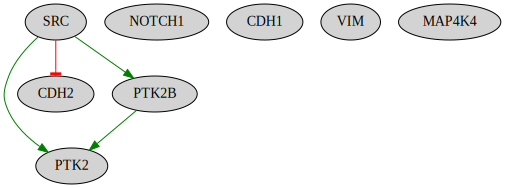

In [5]:
visualizer = NetworkVisualizer(new_net1, color_by='effect')
visualizer.render()

### We can try to connect the disconnected components using the following function. Be careful that the parameter maxlen is used to verify that in the network all the nodes have a distance < than maxlen. The parameter only_signed forces the algorithm to look for just signed intercations. Consensus retrieve those interactions with consensus between the references. Finally, connect_node_when_first_introduced, changes the base algorithm, making it look for possible connection between all the disconnected node in the network when a new bridge-gene is introduced in the network.

In [6]:
%%time
new_net1.complete_connection(mode="ALL", maxlen=3, k_mean="tight", only_signed=True,
                            consensus=True, connect_node_when_first_introduced=True)

looking for paths in the network with length:  0  for node  SRC  and  NOTCH1
looking for paths in the network with length:  1  for node  SRC  and  NOTCH1
looking for paths in the network with length:  2  for node  SRC  and  NOTCH1
looking for paths in the network with length:  3  for node  SRC  and  NOTCH1
i_search =  3
Looking for paths with length:  0  for node  SRC  and  NOTCH1
i_search =  3
Looking for paths with length:  1  for node  SRC  and  NOTCH1
i_search =  3
Looking for paths with length:  2  for node  SRC  and  NOTCH1
[['SRC', 'CTNNB1', 'NOTCH1'], ['SRC', 'RRAS', 'NOTCH1'], ['SRC', 'CHUK', 'NOTCH1'], ['SRC', 'DAB1', 'NOTCH1']]
P12931 P35222
P35222 P46531
P12931 P10301
P46531 P10301
P12931 O15111
P46531 O15111
P12931 O75553
O75553 P46531
P12931 Q05397
P12931 P19022
P12931 Q14289
P12931 P35222
P12931 P10301
P12931 O15111
P12931 O75553
P35222 P46531
P46531 P10301
P46531 O15111
O75553 P46531
Q14289 Q05397
P12830 P35222
P19022 P35222
looking for paths in the network with length:

Q00987 P46531
P49137 Q00987
P49137 P08670
Q00987 P46531
P31749 Q00987
P31749 P08670
P84022 P46531
P31749 P84022
P31749 P08670
Q13627 P46531
Q13627 P55211
P55211 P08670
P46531 P15923
P49137 P15923
P49137 P08670
Q13526 P46531
P53350 Q13526
P53350 P08670
Q13526 P46531
P17612 Q13526
P17612 P08670
P12931 Q05397
P12931 P19022
P12931 Q14289
P12931 P35222
P12931 P10301
P12931 O15111
P12931 O75553
P12931 Q13177
P12931 P60953
P12931 O14920
P12931 P04049
P12931 COMPLEX:O14920_O15111_Q9Y6K9
P12931 P01116
P45983 P12931
P12931 P63000
P17612 P12931
P12931 P31749
P35222 P46531
P46531 P10301
P46531 O15111
O75553 P46531
P49841 P46531
Q96EB6 P46531
P49840 P46531
P25490 P46531
Q92993 P46531
P49768 P46531
Q13950 P46531
Q00987 P46531
P84022 P46531
Q13627 P46531
P46531 P15923
Q13526 P46531
Q14289 Q05397
Q05397 P63000
P42574 Q05397
P12830 P35222
P49841 P12830
P19022 P35222
Q13177 P08670
Q02156 P08670
P17612 P08670
P31749 P08670
P06493 P08670
P53350 P08670
Q96GD4 P08670
P55210 P08670
P42574 P08670
P55212 P0867

i_search =  3
Looking for paths with length:  3  for node  VIM  and  MAP4K4
looking for paths in the network with length:  0  for node  VIM  and  PTK2B
looking for paths in the network with length:  1  for node  VIM  and  PTK2B
looking for paths in the network with length:  2  for node  VIM  and  PTK2B
looking for paths in the network with length:  3  for node  VIM  and  PTK2B
Found a path!
[['VIM', 'PAK2', 'SRC', 'PTK2B'], ['VIM', 'PAK2', 'RAC1', 'PTK2B'], ['VIM', 'PRKACA', 'SRC', 'PTK2B'], ['VIM', 'CASP3', 'PTK2', 'PTK2B'], ['VIM', 'AKT1', 'SRC', 'PTK2B'], ['VIM', 'AKT1', 'RAC1', 'PTK2B']]
looking for paths in the network with length:  0  for node  MAP4K4  and  PTK2B
looking for paths in the network with length:  1  for node  MAP4K4  and  PTK2B
looking for paths in the network with length:  2  for node  MAP4K4  and  PTK2B
looking for paths in the network with length:  3  for node  MAP4K4  and  PTK2B
Found a path!
[['MAP4K4', 'MAP3K1', 'RAC1', 'PTK2B']]
CPU times: user 2min 27s, sys: 

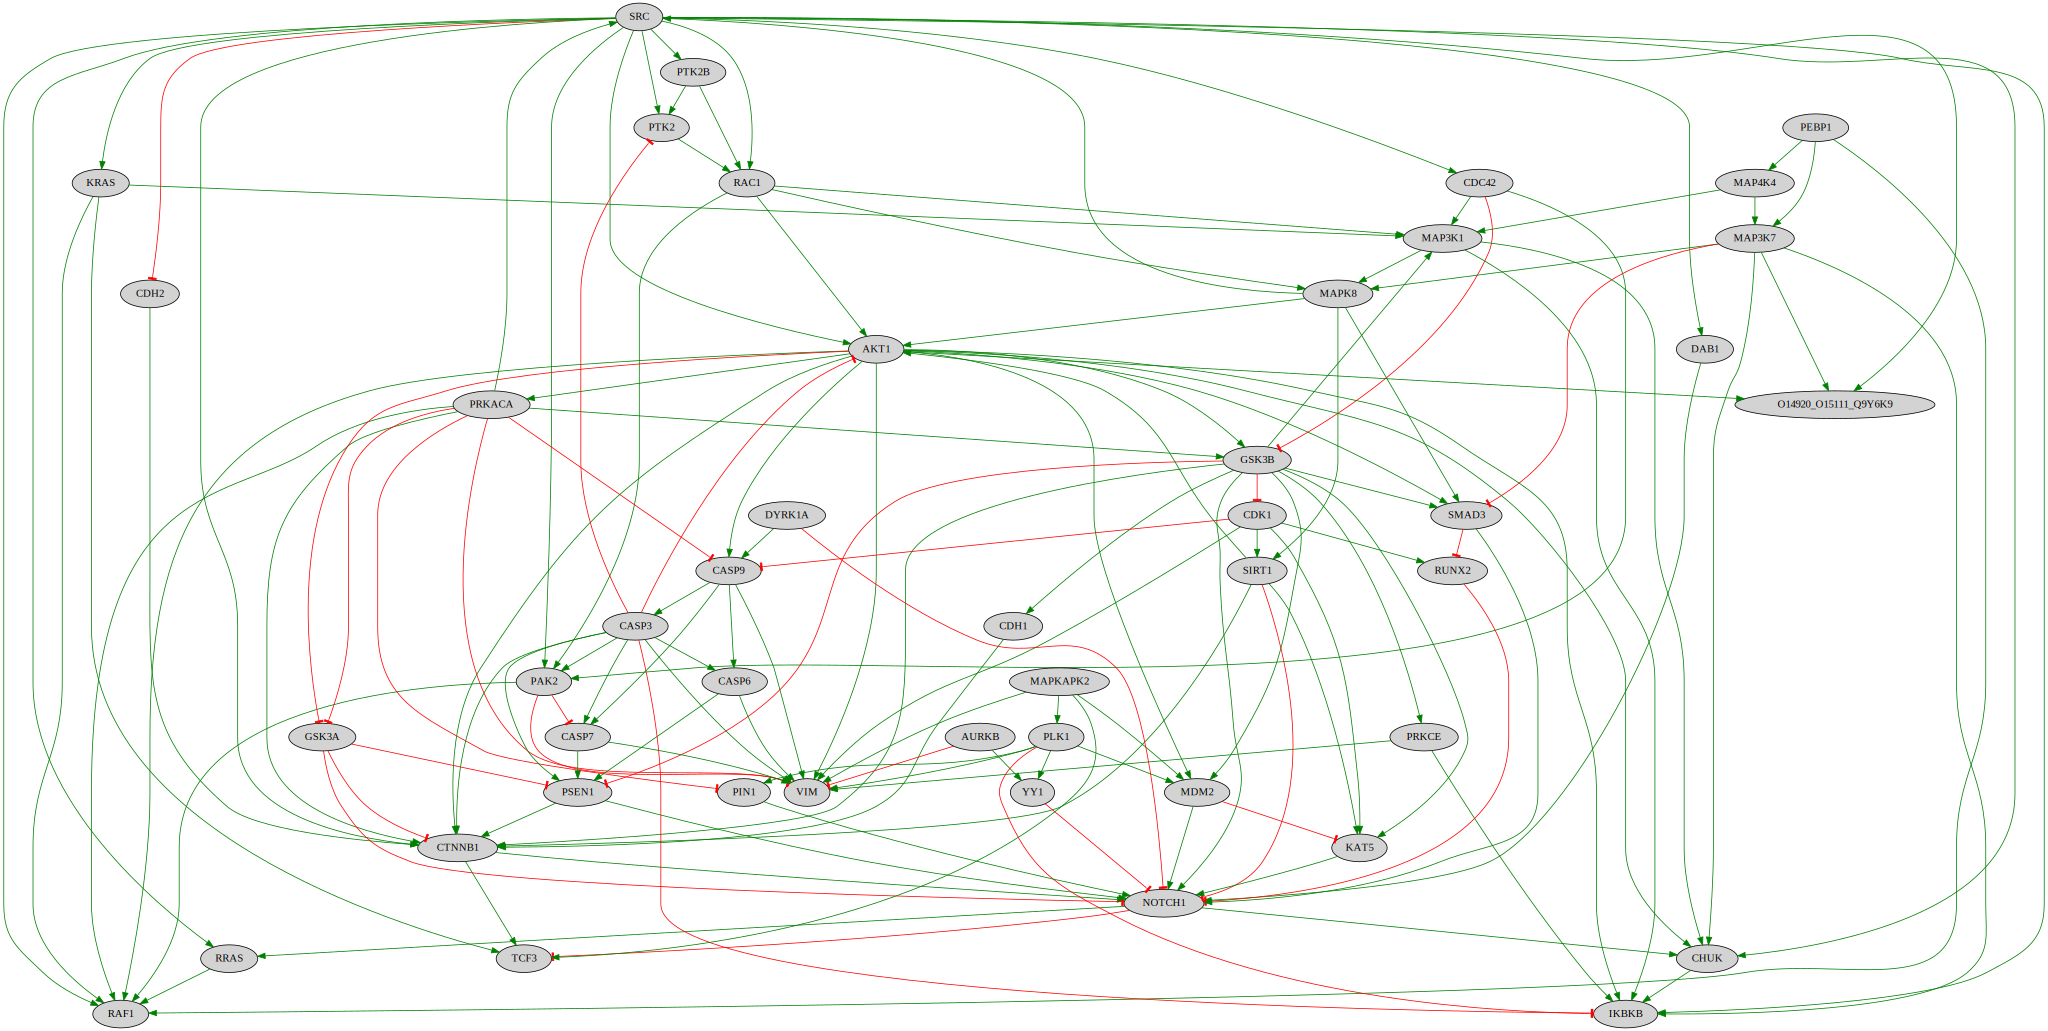

In [7]:
visualizer1 = NetworkVisualizer(new_net1, color_by='effect')
visualizer1.render(output_file='network1')

### If the all_interaction database of omnipath is not sufficient, we can change it or extend it. To do it, we can use the Resources object:

In [8]:
interactions = op.interactions.AllInteractions.get() #first we get the intercations from omnipath

### Then, we can add allInteractions in the Resources object

In [9]:
resources = Resources()
resources.add_database(interactions)

In [10]:
resources.interactions

,source,target,is_directed,is_stimulation,is_inhibition,consensus_direction,consensus_stimulation,consensus_inhibition,curation_effort,references,sources,type,n_sources,n_primary_sources,n_references,references_stripped
0,P0DP23,P48995,True,False,True,True,False,True,3,TRIP:11290752;TRIP:11983166;TRIP:12601176,TRIP,post_translational,1,1,3,11290752;11983166;12601176
1,P0DP25,P48995,True,False,True,True,False,True,3,TRIP:11290752;TRIP:11983166;TRIP:12601176,TRIP,post_translational,1,1,3,11290752;11983166;12601176
2,P0DP24,P48995,True,False,True,True,False,True,3,TRIP:11290752;TRIP:11983166;TRIP:12601176,TRIP,post_translational,1,1,3,11290752;11983166;12601176
3,Q03135,P48995,True,True,False,True,True,False,13,DIP:19897728;HPRD:12732636;IntAct:19897728;Lit...,DIP;HPRD;IntAct;Lit-BM-17;TRIP,post_translational,5,5,8,10980191;12732636;14551243;16822931;18430726;1...
4,P14416,P48995,True,True,False,True,True,False,1,TRIP:18261457,TRIP,post_translational,1,1,1,18261457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276174,439260,P35348,True,False,False,False,False,False,3,Cellinker:10433504;Cellinker:7651358;Cellinker...,Cellinker;Guide2Pharma_Cellinker,small_molecule_protein,2,1,3,10433504;7651358;8564227
276175,5202,Q13639,True,False,False,False,False,False,10,Cellinker:10646498;Cellinker:10683202;Cellinke...,Cellinker;Guide2Pharma_Cellinker,small_molecule_protein,2,1,10,10646498;10683202;10821780;11030734;11218067;1...
276176,6305,Q6DWJ6,True,False,False,False,False,False,1,Cellinker:26349500,Cellinker;Guide2Pharma_Cellinker,small_molecule_protein,2,1,1,26349500
276177,643961,Q9GZU1,True,False,False,False,False,False,1,Cellinker:20802798,Cellinker;Guide2Pharma_Cellinker,small_molecule_protein,2,1,1,20802798


### Now we can explore another database we are interested in, for example, the ligand receptor one

In [11]:
extra = op.interactions.LigRecExtra.get()

### And then we add it to the Resources object

In [12]:
resources.add_database(extra, reset_index=True)

### Now we create the network with a similar list of genes but specifying the Resource object

In [13]:
genes = ["SRC", "NOTCH1", "PTK2", "CDH1", "CDH2", "VIM", "MAP4K4", "PTK2B", "COL1A1"]

In [14]:
%%time
new_net1 = Network(genes, resources=resources)

CPU times: user 17.6 ms, sys: 16 µs, total: 17.6 ms
Wall time: 17 ms


In [15]:
%%time
new_net1.connect_nodes(only_signed=True, consensus_only=True)

P12931 Q05397
P12830 P12931
P12931 P19022
P12931 Q14289
P02452 P12931
P46531 P19022
P46531 P02452
Q14289 Q05397
CPU times: user 1.28 s, sys: 13 ms, total: 1.29 s
Wall time: 1.29 s


In [16]:
%%time
new_net1.complete_connection(mode="ALL", maxlen=3, k_mean="tight", only_signed=True,
                            consensus=True, connect_node_when_first_introduced=True)

looking for paths in the network with length:  0  for node  SRC  and  NOTCH1
looking for paths in the network with length:  1  for node  SRC  and  NOTCH1
looking for paths in the network with length:  2  for node  SRC  and  NOTCH1
Found a path!
[['SRC', 'COL1A1', 'NOTCH1'], ['SRC', 'CDH2', 'NOTCH1']]
looking for paths in the network with length:  0  for node  SRC  and  PTK2
looking for paths in the network with length:  1  for node  SRC  and  PTK2
Found a path!
[['SRC', 'PTK2']]
looking for paths in the network with length:  0  for node  SRC  and  CDH1
looking for paths in the network with length:  1  for node  SRC  and  CDH1
Found a path!
[['SRC', 'CDH1']]
looking for paths in the network with length:  0  for node  SRC  and  CDH2
looking for paths in the network with length:  1  for node  SRC  and  CDH2
Found a path!
[['SRC', 'CDH2']]
looking for paths in the network with length:  0  for node  SRC  and  VIM
looking for paths in the network with length:  1  for node  SRC  and  VIM
look

COMPLEX:Q04206_Q04864 P19022
COMPLEX:P17275_P53539 P19022
COMPLEX:P17535 P19022
COMPLEX:P19838 P19022
COMPLEX:P05412_P17275 P19022
COMPLEX:P05412 P19022
COMPLEX:P15408_P17275 P19022
COMPLEX:P17275 P19022
COMPLEX:P15408_P17535 P19022
COMPLEX:Q04206 P08670
COMPLEX:P19838_Q04864 P08670
COMPLEX:P01100_P05412 P08670
COMPLEX:P01100_P17275 P08670
COMPLEX:Q00653_Q04206 P08670
COMPLEX:P19838_Q04206 P08670
Q02447 P08670
COMPLEX:Q00653 P08670
COMPLEX:P19838_Q00653 P08670
COMPLEX:P01100_P17535 P08670
COMPLEX:P05412_P53539 P08670
Q8WYK2 P08670
P19838 P08670
COMPLEX:Q04864 P08670
COMPLEX:Q01201_Q04864 P08670
COMPLEX:Q01201 P08670
COMPLEX:P17275_P17535 P08670
COMPLEX:P15407_P17275 P08670
COMPLEX:P17535_P53539 P08670
COMPLEX:Q00653_Q04864 P08670
COMPLEX:P05412_P17535 P08670
COMPLEX:P15407_P17535 P08670
COMPLEX:P05412_P15408 P08670
COMPLEX:P19838_Q01201 P08670
COMPLEX:P05412_P15407 P08670
P42229 P08670
COMPLEX:Q01201_Q04206 P08670
COMPLEX:Q00653_Q01201 P08670
COMPLEX:Q04206_Q04864 P08670
P41235 P08670


COMPLEX:Q00653 P12830
COMPLEX:P19838_Q00653 P12830
COMPLEX:P01100_P17535 P12830
COMPLEX:P05412_P53539 P12830
COMPLEX:Q04864 P12830
COMPLEX:Q01201_Q04864 P12830
COMPLEX:Q01201 P12830
COMPLEX:P17275_P17535 P12830
COMPLEX:P15407_P17275 P12830
COMPLEX:P17535_P53539 P12830
COMPLEX:Q00653_Q04864 P12830
COMPLEX:P05412_P17535 P12830
COMPLEX:P15407_P17535 P12830
COMPLEX:P05412_P15408 P12830
COMPLEX:P19838_Q01201 P12830
COMPLEX:P05412_P15407 P12830
COMPLEX:Q01201_Q04206 P12830
COMPLEX:Q00653_Q01201 P12830
COMPLEX:Q04206_Q04864 P12830
COMPLEX:P17275_P53539 P12830
COMPLEX:P17535 P12830
COMPLEX:P19838 P12830
COMPLEX:P05412_P17275 P12830
COMPLEX:P05412 P12830
COMPLEX:P15408_P17275 P12830
COMPLEX:P17275 P12830
COMPLEX:P15408_P17535 P12830
P37231 P12830
COMPLEX:Q04206 P19022
COMPLEX:P19838_Q04864 P19022
COMPLEX:P01100_P05412 P19022
COMPLEX:P01100_P17275 P19022
COMPLEX:Q00653_Q04206 P19022
COMPLEX:P19838_Q04206 P19022
COMPLEX:Q00653 P19022
COMPLEX:P19838_Q00653 P19022
COMPLEX:P01100_P17535 P19022
COMPL

Found a path!
[['CDH2', 'COMPLEX:P01100_P17535', 'VIM'], ['CDH2', 'REL', 'VIM'], ['CDH2', 'JUN', 'VIM'], ['CDH2', 'COMPLEX:Q04206_Q04864', 'VIM'], ['CDH2', 'NFKB1', 'VIM'], ['CDH2', 'COMPLEX:P01100_P17275', 'VIM'], ['CDH2', 'RELB', 'VIM'], ['CDH2', 'COMPLEX:P19838_Q01201', 'VIM'], ['CDH2', 'COMPLEX:P15408_P17275', 'VIM'], ['CDH2', 'JUNB', 'VIM'], ['CDH2', 'COMPLEX:P05412_P17275', 'VIM'], ['CDH2', 'COMPLEX:P17275_P17535', 'VIM'], ['CDH2', 'COMPLEX:P05412_P53539', 'VIM'], ['CDH2', 'COMPLEX:Q00653_Q04206', 'VIM'], ['CDH2', 'COMPLEX:P15407_P17535', 'VIM'], ['CDH2', 'COMPLEX:P17535_P53539', 'VIM'], ['CDH2', 'COMPLEX:P15407_P17275', 'VIM'], ['CDH2', 'COMPLEX:P17275_P53539', 'VIM'], ['CDH2', 'RELA', 'VIM'], ['CDH2', 'COMPLEX:P19838_Q04206', 'VIM'], ['CDH2', 'COMPLEX:Q00653_Q01201', 'VIM'], ['CDH2', 'JUND', 'VIM'], ['CDH2', 'COMPLEX:P19838_Q04864', 'VIM'], ['CDH2', 'COMPLEX:Q00653_Q04864', 'VIM'], ['CDH2', 'NFKB2', 'VIM'], ['CDH2', 'COMPLEX:P05412_P17535', 'VIM'], ['CDH2', 'COMPLEX:P15408_P175

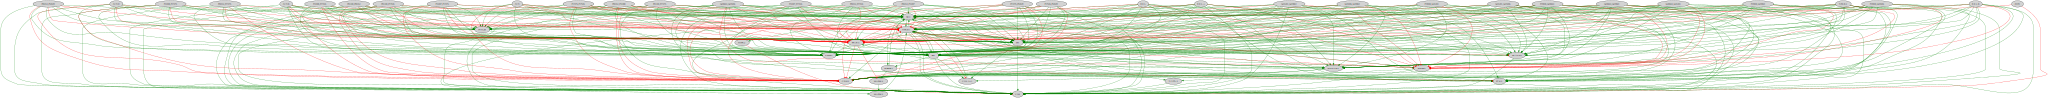

In [17]:
visualizer = NetworkVisualizer(new_net1, color_by='effect')
visualizer.render()

### We can access the network object edges to explore which interactions are in our network

In [18]:
new_net1.edges

,source,target,Type,Effect,References
8080,P12931,Q05397,post_translational,stimulation,Adhesome:10085298;Adhesome:10592173;Adhesome:1...
77863,P12830,P12931,post_translational,stimulation,ACSN:16039586;ACSN:16099633;ACSN:17143292;ACSN...
34553,P12931,P19022,post_translational,inhibition,ACSN:15782139;ACSN:16371504;ACSN:16492141;ACSN...
5786,P12931,Q14289,post_translational,stimulation,Adhesome:10329689;Adhesome:10521452;Adhesome:1...
106165,P02452,P12931,post_translational,stimulation,NaN
...,...,...,...,...,...
181648,P08047,P54762,transcriptional,stimulation,CollecTRI:9918860
140172,COMPLEX:P05412,P37231,transcriptional,inhibition,CollecTRI:11124825;CollecTRI:24464219
140169,COMPLEX:P15408_P17275,P37231,transcriptional,inhibition,CollecTRI:11124825;CollecTRI:24464219
140181,COMPLEX:P17275,P37231,transcriptional,inhibition,CollecTRI:11124825;CollecTRI:24464219


### Finally we can export the network in bnet format with some basic logical equations

In [19]:
from omniflow_project._outputs.exports import Exports

In [20]:
export = Exports(new_net1)

In [21]:
export.export_bnet()

The network has some undefined interaction that will be ignored. WARNING: this can result ina disconnected model! 
['JDP2']
The network has some undefined interaction that will be ignored. WARNING: this can result ina disconnected model! 
['EPHB1']
The network has some undefined interaction that will be ignored. WARNING: this can result ina disconnected model! 
['SRC', 'COMPLEX:P01100_P05412', 'COMPLEX:P01100_P17275', 'COMPLEX:P01100_P17535', 'COMPLEX:P05412_P53539', 'COMPLEX:P17275_P17535', 'COMPLEX:P15407_P17275', 'COMPLEX:P17535_P53539', 'COMPLEX:P05412_P17535', 'COMPLEX:P15407_P17535', 'COMPLEX:P05412_P15408', 'COMPLEX:P05412_P15407', 'COMPLEX:P17275_P53539', 'JUND', 'COMPLEX:P05412_P17275', 'JUN', 'COMPLEX:P15408_P17275', 'JUNB', 'COMPLEX:P15408_P17535', 'PPARG']
The network has some undefined interaction that will be ignored. WARNING: this can result ina disconnected model! 
['JDP2', 'HIPK2']
The network has some undefined interaction that will be ignored. WARNING: this can resul

# TO DO:

- method to print sif file with reference for each interaction (easy task)
- more utility functions (???)